In [10]:
import os
import tensorflow as tf
from util import constants
from util.config_util import get_model_params, get_task_params, get_train_params
from tf2_models.trainer import Trainer
from absl import app
from absl import flags
import numpy as np
from util.models import MODELS
from util.tasks import TASKS
import tensorflow_probability as tfp

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")

from tqdm import tqdm
from calibration_util import *
from notebook_utils import *


In [7]:
chkpt_dir='../tf_ckpts'
task_name = 'word_sv_agreement_vp'
task = TASKS[task_name](get_task_params(), data_dir='../data')
cl_token = task.databuilder.sentence_encoder().encode(constants.bos)


Vocab len:  10032


In [ ]:
student_exp_name='samira_fd1'
teacher_exp_name='0.0001_offlineteacher_v3'
teacher_config='small_lstm_v4'
task_name = 'word_sv_agreement_vp'
student_model='cl_gpt2'
teacher_model='cl_lstm'
student_config='small_gpt_v9'
distill_config='pure_distill_2'
distill_mode='offline'

chkpt_dir='../tf_ckpts'

In [ ]:
task = TASKS[task_name](get_task_params(), data_dir='../data')

In [ ]:
teacher_model = MODELS[teacher_model](hparams=get_model_params(task, teacher_model, teacher_config), cl_token=cl_token)
std_hparams=get_model_params(task, student_model, student_config)
std_hparams.output_attentions = True
std_hparams.output_embeddings = True
student_model = MODELS[student_model](
std_hparams, cl_token=cl_token)

In [ ]:
student_ckpt_dir = os.path.join(chkpt_dir, task.name,
                              '_'.join([distill_mode,distill_config,
                                        "teacher", teacher_model.model_name, 
                                        #teacher_config,
                                        teacher_exp_name,
                                       "student",student_model.model_name,
                                        str(student_config),
                                        student_exp_name]))
print("student_checkpoint:", student_ckpt_dir)

In [ ]:
student_ckpt = tf.train.Checkpoint(net=student_model)
student_manager = tf.train.CheckpointManager(student_ckpt, student_ckpt_dir, max_to_keep=None)

student_ckpt.restore(student_manager.latest_checkpoint)
if student_manager.latest_checkpoint:
  print("Restored student from {}".format(student_manager.latest_checkpoint))

student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
student_model.evaluate(task.test_dataset, steps=100)

In [ ]:
teacher_ckpt_dir = os.path.join(chkpt_dir, task.name,
                                  '_'.join([teacher_model.model_name, teacher_config,teacher_exp_name]))

teacher_ckpt = tf.train.Checkpoint(net=teacher_model)
teacher_manager = tf.train.CheckpointManager(teacher_ckpt, teacher_ckpt_dir, max_to_keep=None)

teacher_ckpt.restore(teacher_manager.latest_checkpoint)
if teacher_manager.latest_checkpoint:
  print("Restored student from {}".format(teacher_manager.latest_checkpoint))

In [ ]:
teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
teacher_model.evaluate(task.test_dataset, steps=100)

In [3]:
config = {'student_exp_name':'lisa_fd220',
        'teacher_exp_name':'0.001_samira_offlineteacher_v11',
        'teacher_config':'small_gpt_v9',
        'student_model':'cl_bert',
        'teacher_model':'cl_gpt2',
        'student_config':'small_gpt_v9',
        'distill_config':'pure_dstl_4_crs_slw',
        'distill_mode':'offline',
        'chkpt_dir':'../tf_ckpts',}
                
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
           
student_get_student_model(config, task, std_hparams, cl_token))
config = {'student_exp_name':'lisa_fd226',
        'teacher_exp_name':'0.001_samira_offlineteacher_v5',
        'teacher_config':'small_gpt_v9',
        'student_model':'cl_bert',
        'teacher_model':'cl_gpt2',
        'student_config':'small_gpt_v9',
        'distill_config':'pure_dstl_4_crs_slw',
        'distill_mode':'offline',
        'chkpt_dir':'../tf_ckpts',}
                
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
           
print(get_student_model(config, task, std_hparams, cl_token))
config = {'student_exp_name':'lisa_fd225',
        'teacher_exp_name':'0.001_samira_offlineteacher_v5',
        'teacher_config':'small_gpt_v9',
        'student_model':'cl_bert',
        'teacher_model':'cl_gpt2',
        'student_config':'small_gpt_v9',
        'distill_config':'pure_dstl_4_crs_slw',
        'distill_mode':'offline',
        'chkpt_dir':'../tf_ckpts',}
                
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
           
print(get_student_model(config, task, std_hparams, cl_token))


SyntaxError: invalid syntax (<ipython-input-3-1066092a682c>, line 13)

In [38]:
config = {'exp_name':'lisa_crs_slw_offlineteacher_v11',
        'model_config':'small_gpt_v9',
        'model_name':'cl_bert',
        'chkpt_dir':'../tf_ckpts',
        'learning_rate': 0.001 }
hparams=get_model_params(task, config['model_name'], config['model_config'])
bert, ckpnt = get_model(config, task, hparams, cl_token)


config = {'exp_name':'samira_offlineteacher_v11',
        'model_config':'small_lstm_v4',
        'model_name':'cl_lstm',
        'chkpt_dir':'../tf_ckpts',
         'learning_rate': 0.001 }
hparams=get_model_params(task, config['model_name'], config['model_config'])
lstm, ckpnt = get_model(config, task, hparams, cl_token)

config = {'student_exp_name':'lisa_fd150',
        'teacher_exp_name':'0.001_samira_offlineteacher_v11',
        'teacher_config':'small_lstm_v4',
        'student_model':'cl_bert',
        'teacher_model':'cl_lstm',
        'student_config':'small_gpt_v9',
        'distill_config':'pure_dstl_4_crs_slw',
        'distill_mode':'offline',
        'chkpt_dir':'../tf_ckpts',}
 
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
lstm2bert, ckpnt = get_student_model(config, task, std_hparams, cl_token)

model config: small_gpt_v9
{'embedding_dim': 128, 'resid_pdrop': 0.4, 'embd_pdrop': 0.2, 'attn_pdrop': 0.6, 'initializer_range': 0.05}
Restored student from ../tf_ckpts/word_sv_agreement_vp/cl_bert_h-128_d-6_rdrop-0.4_adrop-0.6_indrop-0.2_small_gpt_v9_0.001_lisa_crs_slw_offlineteacher_v11/ckpt-60
model config: small_lstm_v4
{'hidden_dim': 256, 'embedding_dim': 256, 'depth': 2, 'hidden_dropout_rate': 0.8, 'input_dropout_rate': 0.2, 'initializer_range': 0.1}
Restored student from ../tf_ckpts/word_sv_agreement_vp/cl_lstm_em-256_h-256_d-2_hdrop-0.8_indrop-0.2_small_lstm_v4_0.001_samira_offlineteacher_v11/ckpt-60
model config: small_gpt_v9
{'embedding_dim': 128, 'resid_pdrop': 0.4, 'embd_pdrop': 0.2, 'attn_pdrop': 0.6, 'initializer_range': 0.05}
model config: small_lstm_v4
{'hidden_dim': 256, 'embedding_dim': 256, 'depth': 2, 'hidden_dropout_rate': 0.8, 'input_dropout_rate': 0.2, 'initializer_range': 0.1}
student_checkpoint: ../tf_ckpts/word_sv_agreement_vp/offline_pure_dstl_4_crs_slw_teach

In [13]:
def plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=10):
    p_confidence_bins = np.zeros(n_bins)
    n_confidence_bins = np.zeros(n_bins)
    total_confidence_bins = np.zeros(n_bins)
    
    denominator = 100.0 / n_bins
    for i in np.arange(len(model_accuracy)):
        if model_accuracy[i]:
            p_confidence_bins[min(int(predicted_class_probs[i]*100 // denominator),n_bins-1)] += 1.0
        else:
            n_confidence_bins[min(int(predicted_class_probs[i]*100 // denominator),n_bins-1)] -= 1.0
            
        total_confidence_bins[min(int(predicted_class_probs[i]*100 // denominator),n_bins-1)] += 1

    #sns.stripplot(model_accuracy,predicted_class_probs, color='blue', alpha=0.5, jitter=True)
    #sns.stripplot(model_accuracy,correct_class_probs, color='green', alpha=0.2, jitter=True)
    #sns.swarmplot(model_accuracy,predicted_class_probs, color='blue', alpha=0.5)
    #plt.show()
   
    sns.barplot(x=np.arange(0,n_bins)*denominator, 
                y=np.arange(0,n_bins)/n_bins, 
                color='green', alpha=0.2, edgecolor='black')
    ax = sns.barplot(x=np.arange(0,n_bins)*denominator, 
                    y=p_confidence_bins/total_confidence_bins, 
                    color='red', alpha=0.5, edgecolor='black')
    
    x_ticks = np.arange(0,n_bins,2)
    x_tick_labels = x_ticks / np.float32(n_bins)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, fontsize=10)
    
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    
    return p_confidence_bins,n_confidence_bins,total_confidence_bins

In [14]:
bert_accuracy, bert_predicted_class_probs, bert_correct_class_probs, bert_logits, bert_trues = test_for_calibration(bert, task, n_bins=20)

/home/samira/anaconda3/envs/indist/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


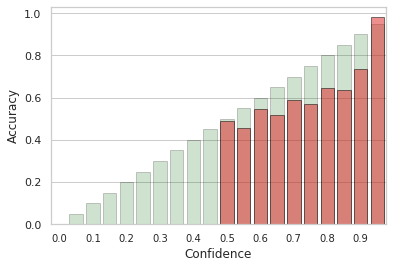

In [15]:
p_confidence_bins,n_confidence_bins,total_confidence_bins = plot_calibration(bert_accuracy, bert_predicted_class_probs, bert_correct_class_probs, n_bins=20)

In [25]:
bert_bins = p_confidence_bins / total_confidence_bins

/home/samira/anaconda3/envs/indist/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [36]:
lstm_accuracy, lstm_predicted_class_probs, lstm_correct_class_probs, lstm_logits, lstm_trues = test_for_calibration(lstm, task, n_bins=20)

/home/samira/anaconda3/envs/indist/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/samira/anaconda3/envs/indist/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


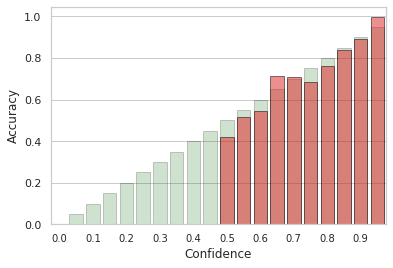

In [37]:
p_confidence_bins,n_confidence_bins,total_confidence_bins = plot_calibration(lstm_accuracy, lstm_predicted_class_probs, lstm_correct_class_probs, n_bins=20)
lstm_bins = p_confidence_bins / total_confidence_bins

In [43]:
lstm2bert_accuracy, lstm2bert_predicted_class_probs, lstm2bert_correct_class_probs, lstm2bert_logits, lstm2bert_trues = test_for_calibration(lstm2bert, task, n_bins=20)

/home/samira/anaconda3/envs/indist/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/samira/anaconda3/envs/indist/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


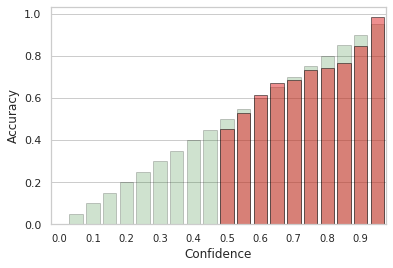

In [44]:
p_confidence_bins,n_confidence_bins,total_confidence_bins = plot_calibration(lstm2bert_accuracy, lstm2bert_predicted_class_probs, lstm2bert_correct_class_probs, n_bins=20)
lstm2bert_bins = p_confidence_bins / total_confidence_bins

In [45]:
i = 0
for a,b,c in zip(lstm_bins, bert_bins, lstm2bert_bins):
    print(a, b, c, i)
    i+= 0.05

nan nan nan 0
nan nan nan 0.05
nan nan nan 0.1
nan nan nan 0.15000000000000002
nan nan nan 0.2
nan nan nan 0.25
nan nan nan 0.3
nan nan nan 0.35
nan nan nan 0.39999999999999997
nan nan nan 0.44999999999999996
0.42 0.489247311827957 0.45454545454545453 0.49999999999999994
0.5166666666666667 0.45695364238410596 0.5306122448979592 0.5499999999999999
0.5471698113207547 0.5449101796407185 0.6137931034482759 0.6
0.7124183006535948 0.52 0.672316384180791 0.65
0.7076923076923077 0.5885714285714285 0.6861702127659575 0.7000000000000001
0.6865671641791045 0.5678391959798995 0.73224043715847 0.7500000000000001
0.7630057803468208 0.6445497630331753 0.7440758293838863 0.8000000000000002
0.8367346938775511 0.6346153846153846 0.7644230769230769 0.8500000000000002
0.8899082568807339 0.7382075471698113 0.8448753462603878 0.9000000000000002
0.9964446875427321 0.9813714120034792 0.9836705715299965 0.9500000000000003
